---
# Project: Analysis of Batter-Pitcher Interactions Using Bat Speed and Swing Length

### Overview

This project aims to explore the intricate dynamics between batters and pitchers by analyzing new baseball data on bat speed and swing length. Using detailed pitch-level data from Major League Baseball games between 04/02/2024 and 06/30/2024, the study investigates how these metrics influence or reflect various aspects of the batter-pitcher interaction.

### Program Description

**Stage/Step 1:** This program utilizes pre-processed MLB data to perform model training and evaluation, focusing on the relationship between bat speed, swing length, and batter performance metrics.

### Analysis Focus

The notebook concentrates on:

- Examining the correlation between bat speed, swing length, and plate discipline.
- Identifying patterns in swing types relative to different game situations.
- Evaluating the influence of pitchers on batter swing mechanics.

### High-Level Process Flow

1. **Loading Data**
2. **Data Preprocessing**
3. **Exploratory Data Analysis**
4. **Model Training and Evaluation**
5. **Results Visualization**
6. **Exporting Findings**

### Data

- **Input Data:** MLB pitch-level dataset with bat speed and swing length metrics (04/02/2024 - 06/30/2024).
- **Output Data:** Model performance metrics, analytical results, and visualizations.

### Special Instructions

- Ensure the input data path is correctly specified before running the script.
- Dependencies include libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`.

### Author and Timing

- **Author:** *Sathwik Bollepalli*
- **Date:** *10/22/2024*

---

# Importing Required Libraries

In [56]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

In [57]:
pitch_swing_data = pd.read_csv(
    'statcast_pitch_swing_data_20240402_20241030_with_arm_angle.zip', 
    compression='zip',
    engine='python'
)
pitch_swing_data.shape

(701557, 113)

In [58]:
pitch_swing_data.sample(5)

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
47579          ST  2024-04-14           78.1           4.15           4.34   
171124         CH  2024-05-16           83.8          -1.67           4.79   
181481         FC  2024-05-19           82.7          -2.45           5.62   
44072          SI  2024-04-13           87.7           4.50           4.39   
284076         SI  2024-06-15           91.4           2.24           5.99   

             player_name  batter  pitcher     events    description  ...  \
47579    Mullins, Cedric  656775   571948     double  hit_into_play  ...   
171124  Palacios, Richie  680700   681867  field_out  hit_into_play  ...   
181481       Baty, Brett  683146   664350  field_out  hit_into_play  ...   
44072     Cowser, Colton  681297   571948  field_out  hit_into_play  ...   
284076      Millas, Drew  686452   669432  field_out  hit_into_play  ...   

        n_thruorder_pitcher  n_priorpa_thisgame_player_at_bat  \
47579                     1                                 3   
171124                    1                                 0   
181481                    2                                 1   
44072                     1                                 3   
284076                    3                                 2   

        pitcher_days_since_prev_game  batter_days_since_prev_game  \
47579                            1.0                          1.0   
171124                           5.0                          1.0   
181481                           6.0                          2.0   
44072                            3.0                          1.0   
284076                           6.0                          2.0   

        pitcher_days_until_next_game batter_days_until_next_game  \
47579                            2.0                         1.0   
171124                           5.0                         1.0   
181481                           6.0                         1.0   
44072                            1.0                         1.0   
284076                           6.0                         6.0   

       api_break_z_with_gravity api_break_x_arm api_break_x_batter_in  \
47579                      3.88           -0.44                 -0.44   
171124                     3.85            1.22                 -1.22   
181481                     3.23           -0.67                  0.67   
44072                      2.88            1.46                  1.46   
284076                     1.94            1.41                 -1.41   

       arm_angle  
47579       -1.3  
171124      10.0  
181481      30.3  
44072       -2.8  
284076      27.2  

[5 rows x 113 columns]

# Data Cleaning / EDA

In [59]:
pitch_swing_data.describe()

release_speed  release_pos_x  release_pos_z         batter  \
count  701270.000000  701271.000000  701271.000000  701557.000000   
mean       89.174057      -0.827273       5.758310  642497.393049   
std         5.988460       1.873904       0.527868   50941.721641   
min        31.900000      -4.730000       0.780000  444482.000000   
25%        84.900000      -2.140000       5.490000  621493.000000   
50%        90.000000      -1.510000       5.800000  663898.000000   
75%        94.000000       0.840000       6.080000  672580.000000   
max       105.500000       4.620000       8.060000  808982.000000   

             pitcher  spin_dir  spin_rate_deprecated  break_angle_deprecated  \
count  701557.000000       0.0                   0.0                     0.0   
mean   637717.692383       NaN                   NaN                     NaN   
std     53957.153358       NaN                   NaN                     NaN   
min    434378.000000       NaN                   NaN                     NaN   
25%    607455.000000       NaN                   NaN                     NaN   
50%    657508.000000       NaN                   NaN                     NaN   
75%    671737.000000       NaN                   NaN                     NaN   
max    814005.000000       NaN                   NaN                     NaN   

       break_length_deprecated           zone  ...  n_thruorder_pitcher  \
count                      0.0  701271.000000  ...        701557.000000   
mean                       NaN       9.033740  ...             1.486043   
std                        NaN       4.239809  ...             0.709016   
min                        NaN       1.000000  ...             1.000000   
25%                        NaN       5.000000  ...             1.000000   
50%                        NaN      11.000000  ...             1.000000   
75%                        NaN      13.000000  ...             2.000000   
max                        NaN      14.000000  ...             4.000000   

       n_priorpa_thisgame_player_at_bat  pitcher_days_since_prev_game  \
count                     701557.000000                 682823.000000   
mean                           1.526134                      6.047525   
std                            1.249047                      8.681786   
min                            0.000000                      0.000000   
25%                            0.000000                      3.000000   
50%                            1.000000                      5.000000   
75%                            3.000000                      6.000000   
max                            6.000000                    180.000000   

       batter_days_since_prev_game  pitcher_days_until_next_game  \
count                698634.000000                 669221.000000   
mean                      1.693257                      6.149014   
std                       3.805934                      8.905078   
min                       0.000000                      0.000000   
25%                       1.000000                      3.000000   
50%                       1.000000                      5.000000   
75%                       2.000000                      6.000000   
max                     162.000000                    149.000000   

       batter_days_until_next_game  api_break_z_with_gravity  api_break_x_arm  \
count                693316.000000             701266.000000    701271.000000   
mean                      1.652483                  2.324220         0.328143   
std                       3.519385                  1.059319         0.841120   
min                       0.000000                  0.270000        -2.950000   
25%                       1.000000                  1.400000        -0.320000   
50%                       1.000000                  2.230000         0.500000   
75%                       2.000000                  3.000000         1.050000   
max                     162.000000                 24.300000         

In [60]:
pitch_swing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701557 entries, 0 to 701556
Columns: 113 entries, pitch_type to arm_angle
dtypes: float64(62), int64(34), object(17)
memory usage: 604.8+ MB


## Columns with 100% missing values

In [61]:
missing_pct = pd.DataFrame(pitch_swing_data.isnull().mean()*100).reset_index()

missing_pct[missing_pct[0]>99]

index      0
10                 spin_dir  100.0
11     spin_rate_deprecated  100.0
12   break_angle_deprecated  100.0
13  break_length_deprecated  100.0
39           tfs_deprecated  100.0
40      tfs_zulu_deprecated  100.0
41                   umpire  100.0
42                    sv_id  100.0

In [62]:
missing_pct[missing_pct[0]>99]['index'].values

array(['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated',
       'umpire', 'sv_id'], dtype=object)

## Dropping Completely null columns

In [63]:
pitch_swing_data.drop(missing_pct[missing_pct[0]>99]['index'].values, axis =1, inplace = True)

In [64]:
# Check number of unique values for categorical columns
for col in pitch_swing_data.columns:
    data_type = pitch_swing_data[col].dtype
    if data_type == 'object':
        num_unique = pitch_swing_data[col].nunique()
        print(f"{col} ({data_type}): {num_unique} unique values")


pitch_type (object): 17 unique values
game_date (object): 202 unique values
player_name (object): 651 unique values
events (object): 21 unique values
description (object): 13 unique values
des (object): 121513 unique values
game_type (object): 5 unique values
stand (object): 2 unique values
p_throws (object): 2 unique values
home_team (object): 30 unique values
away_team (object): 30 unique values
type (object): 3 unique values
bb_type (object): 4 unique values
inning_topbot (object): 2 unique values
pitch_name (object): 17 unique values
if_fielding_alignment (object): 3 unique values
of_fielding_alignment (object): 3 unique values


In [68]:
# pitch_swing_data[pitch_swing_data['game_pk'] == 745273]#['pitch_number']

In [69]:
# pitch_swing_data[[ 'game_pk', 'pitch_number', 'at_bat_number']].drop_duplicates()

In [82]:
# Identify categorical columns
categorical_columns = pitch_swing_data.select_dtypes(include=['object']).columns

# Print value counts for each categorical column
for col in categorical_columns:
    print(f"Percentage of counts for {col}:")
    print(pitch_swing_data[col].value_counts(normalize=True)*100)
    print("\n")

Percentage of counts for pitch_type:
pitch_type
FF    31.813521
SI    15.960734
SL    15.835818
CH    10.190925
FC     8.152483
CU     6.560231
ST     6.081814
FS     3.000694
KC     1.667258
SV     0.377172
KN     0.132616
FA     0.088268
EP     0.081994
SC     0.025953
FO     0.020249
PO     0.007273
CS     0.002995
Name: proportion, dtype: float64


Percentage of counts for game_date:
game_date
2024-08-07    0.744773
2024-04-13    0.717120
2024-07-20    0.694314
2024-04-20    0.691891
2024-07-27    0.679062
                ...   
2024-10-25    0.043760
2024-10-03    0.041194
2024-10-26    0.039911
2024-10-13    0.039484
2024-10-11    0.029933
Name: proportion, Length: 202, dtype: float64


Percentage of counts for player_name:
player_name
Soto, Juan         0.445581
Judge, Aaron       0.436601
Ohtani, Shohei     0.428761
Torres, Gleyber    0.428049
Alonso, Pete       0.425198
                     ...   
Roller, Chris      0.000855
McGough, Scott     0.000570
Castillo, Luis     0.000

In [72]:
# Dropping single record for '4th outfielder' as it is not a valid fielding alignment
pitch_swing_data = pitch_swing_data[pitch_swing_data['of_fielding_alignment'] != '4th outfielder']


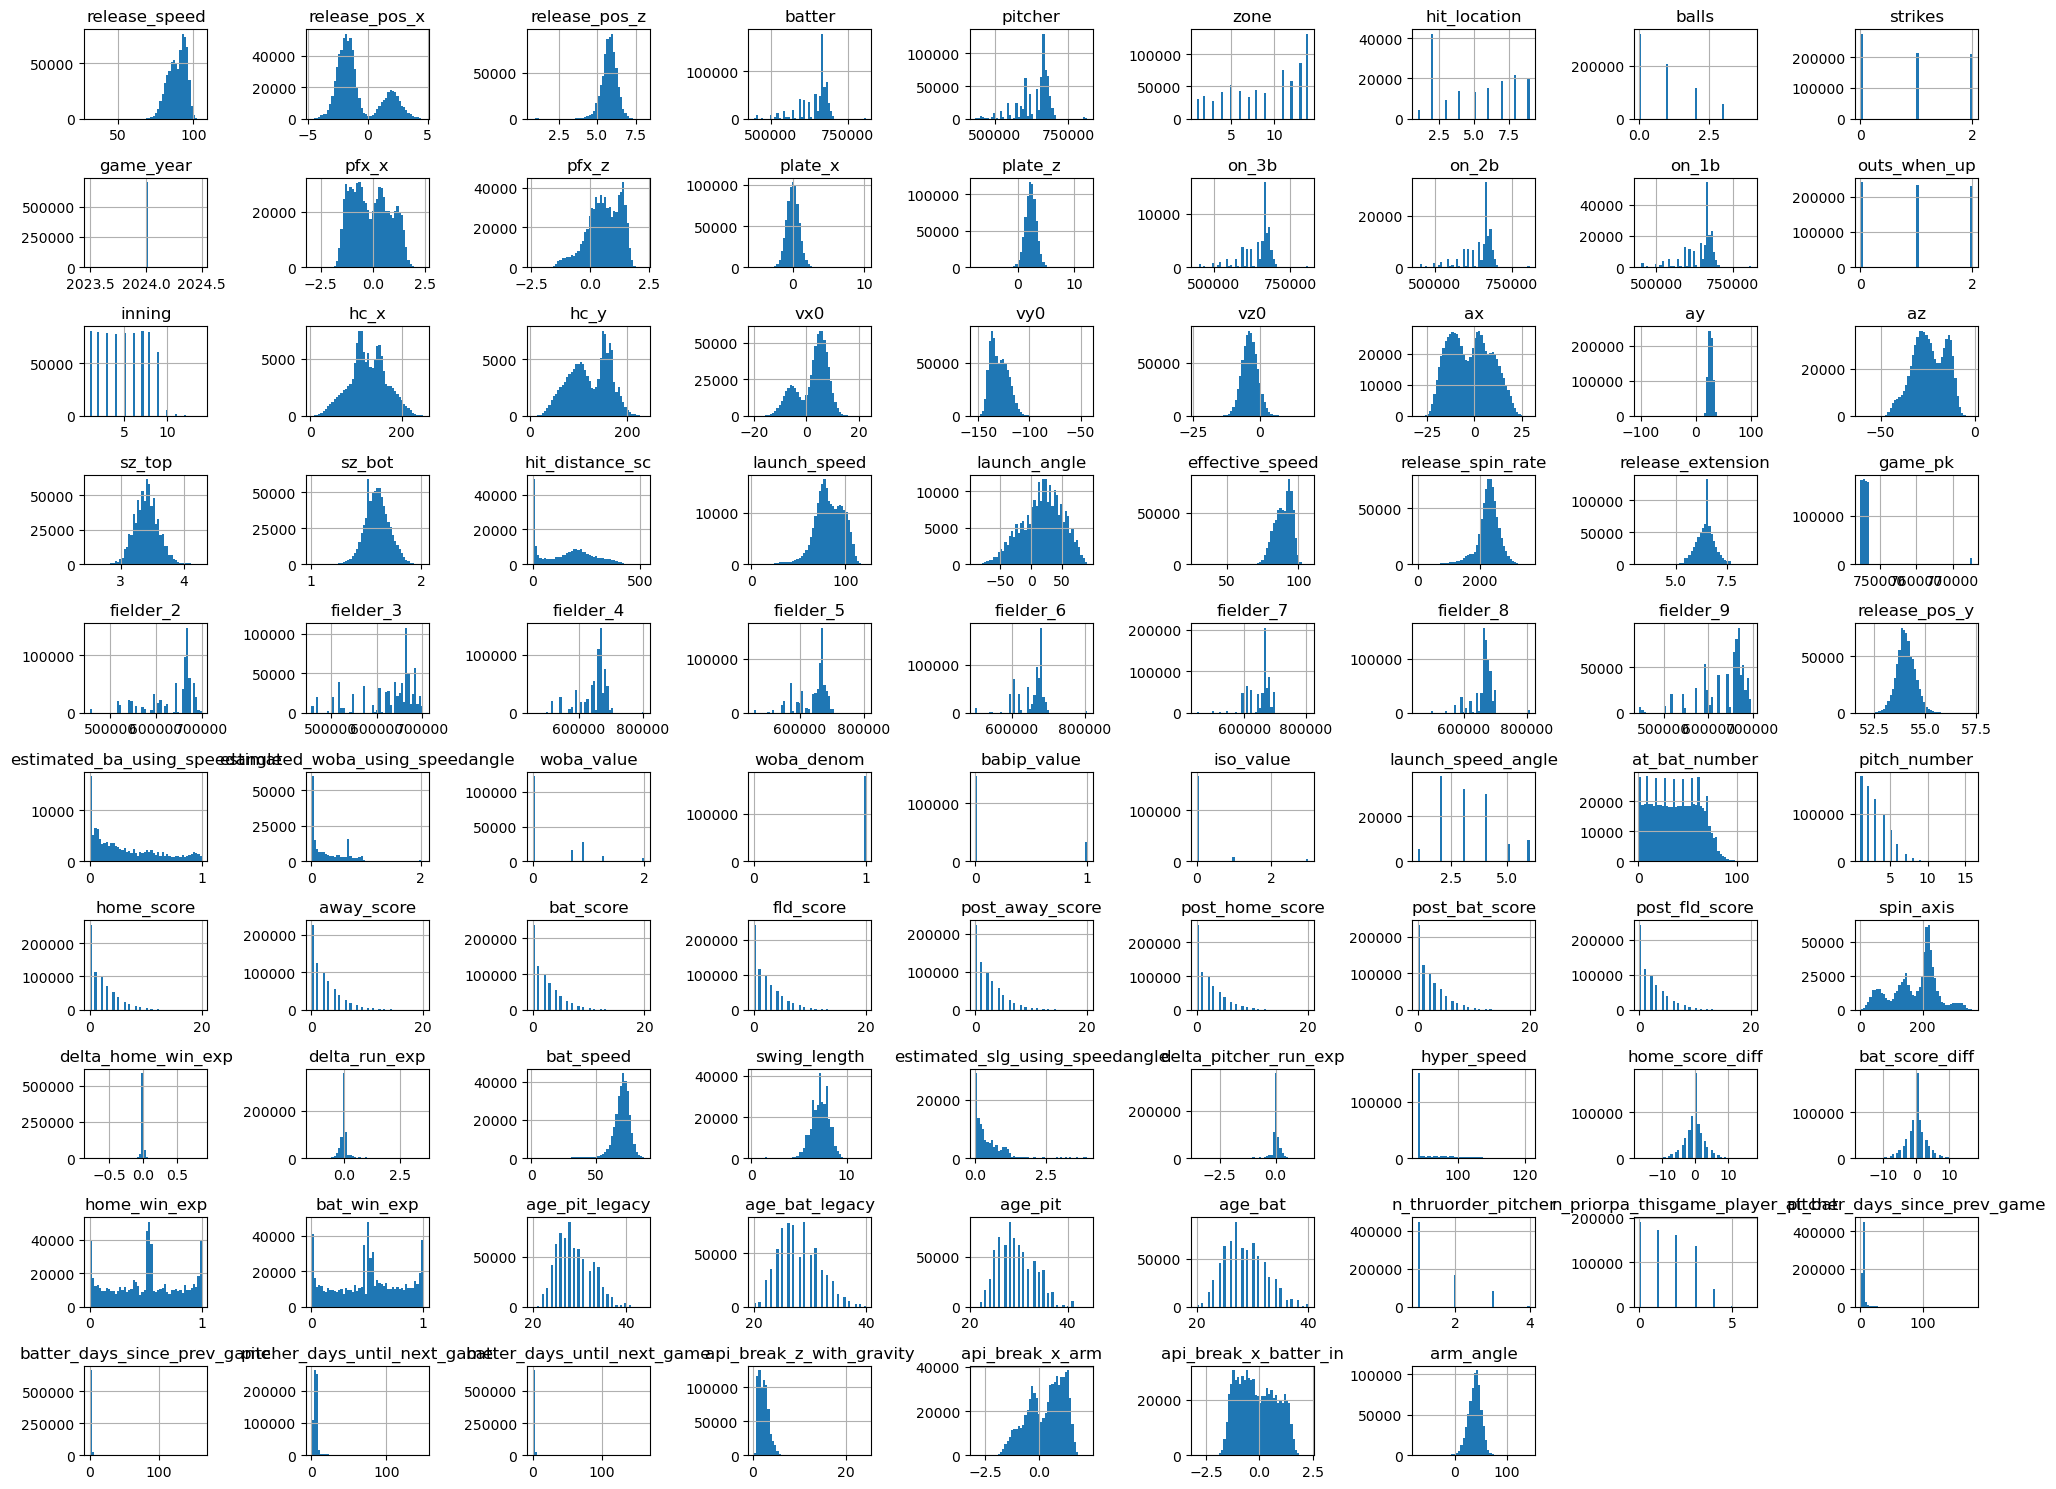

In [73]:
# Select continuous variables (numeric columns)
continuous_columns = pitch_swing_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each continuous variable
pitch_swing_data[continuous_columns].hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

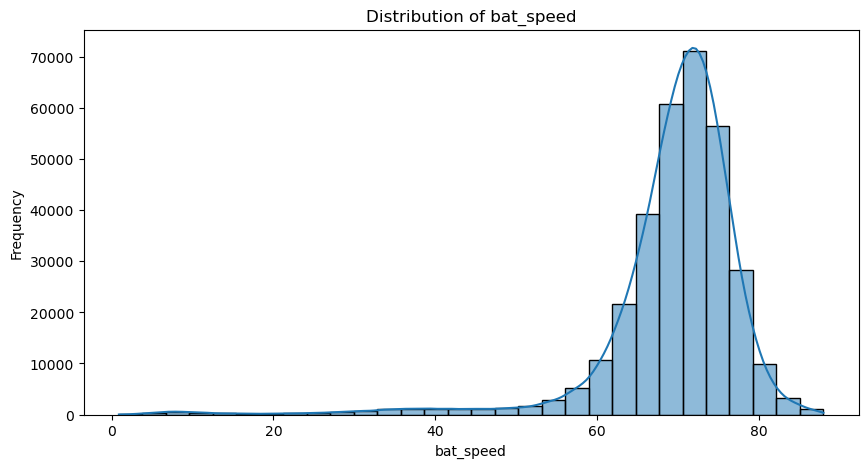

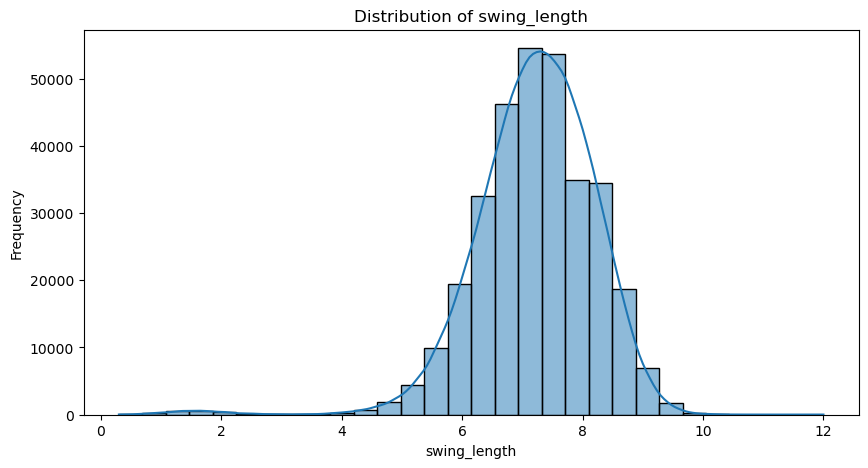

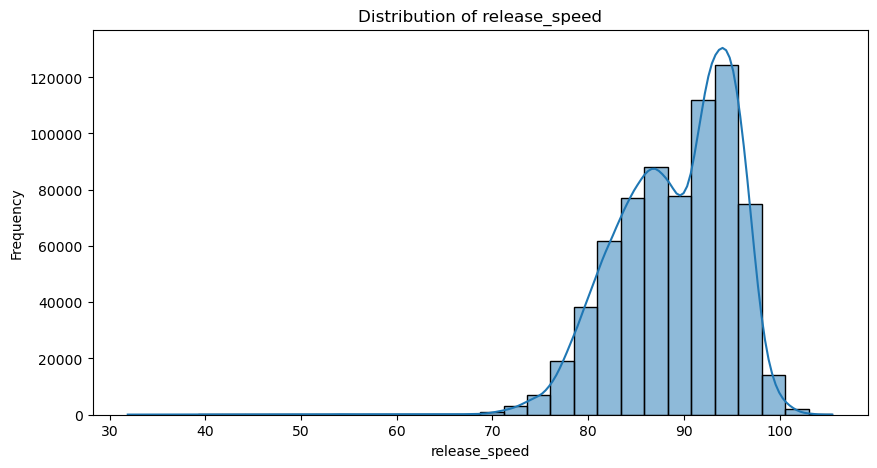

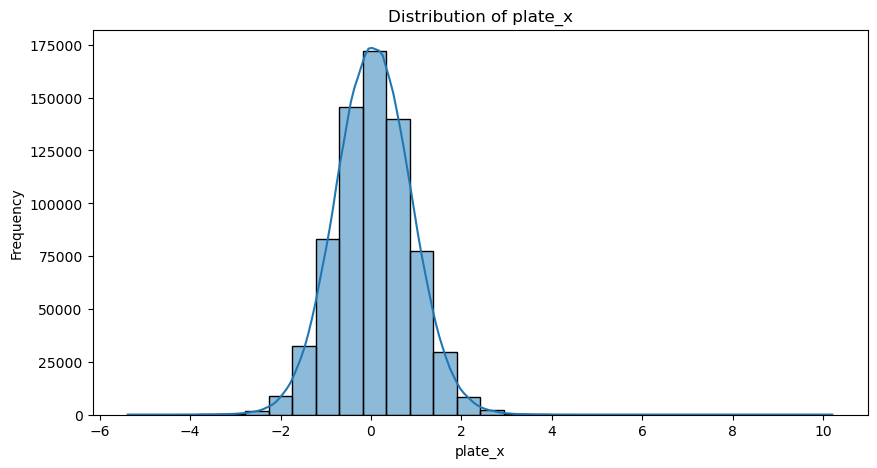

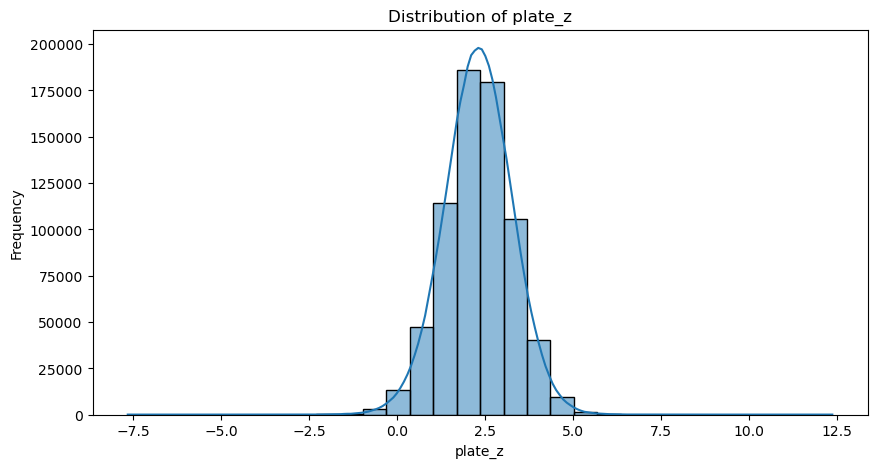

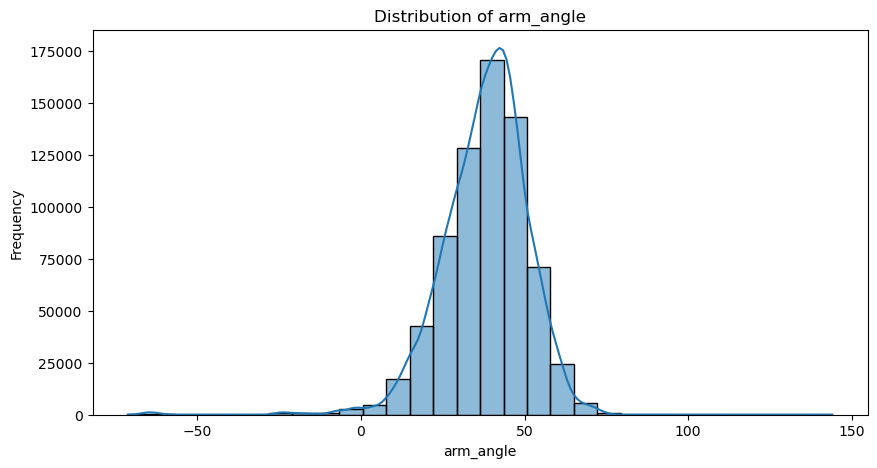

In [83]:
# List of numerical features to analyze
numerical_features = ['bat_speed', 'swing_length', 'release_speed', 'plate_x', 'plate_z', 'arm_angle']

# Plotting histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(pitch_swing_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


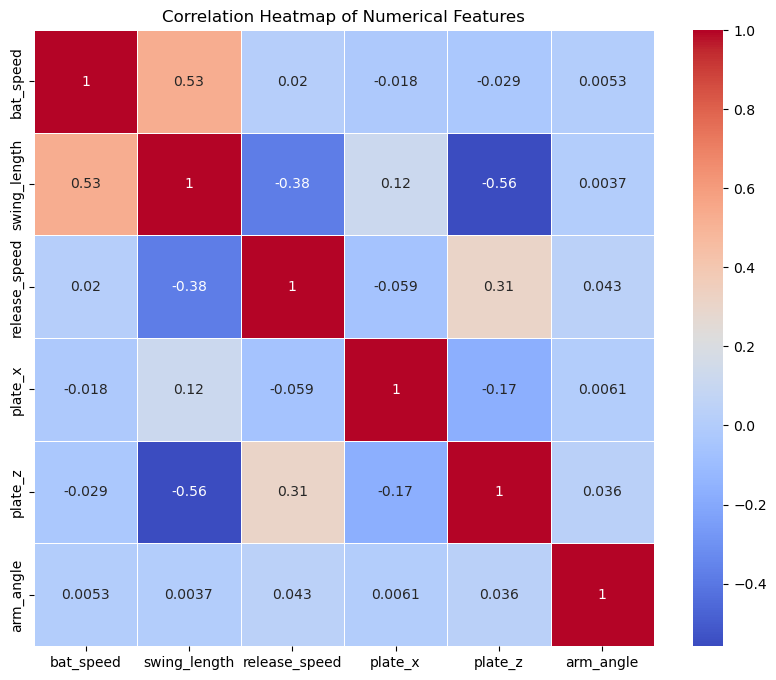

In [86]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features
numerical_features = ['bat_speed', 'swing_length', 'release_speed', 'plate_x', 'plate_z', 'arm_angle']
corr_matrix = pitch_swing_data[numerical_features].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


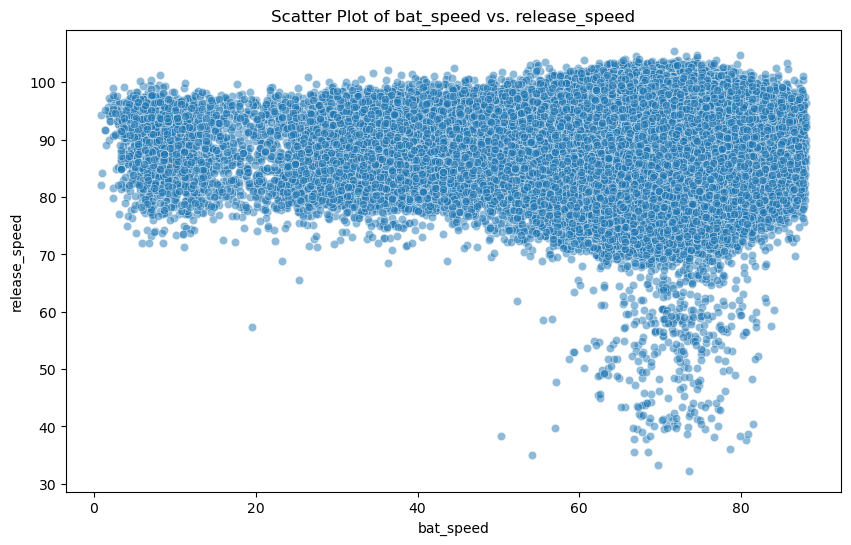

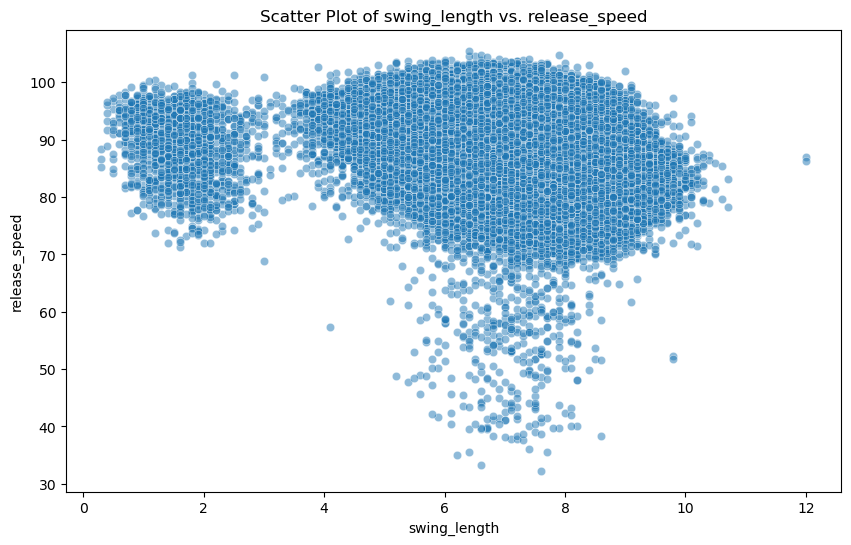

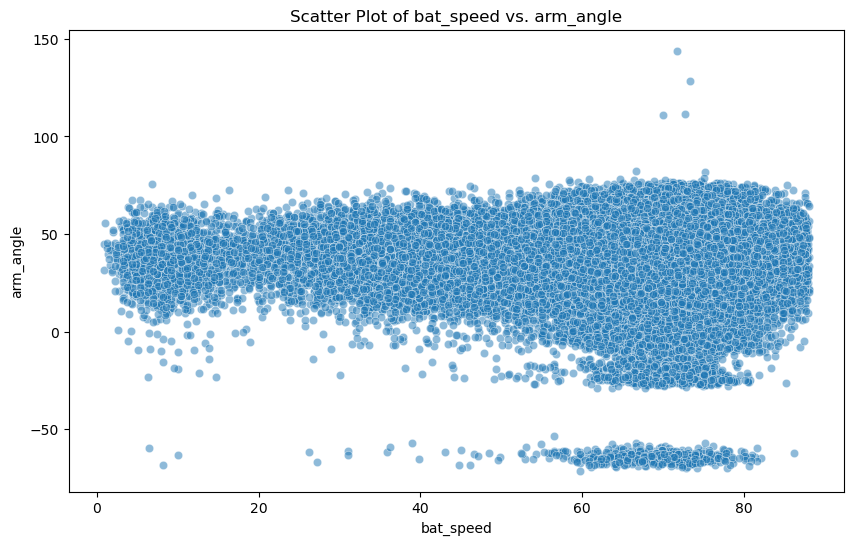

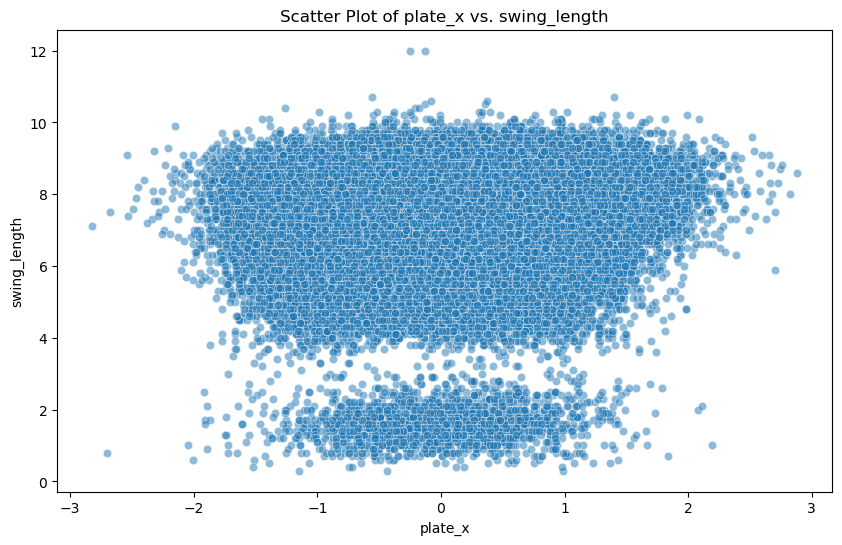

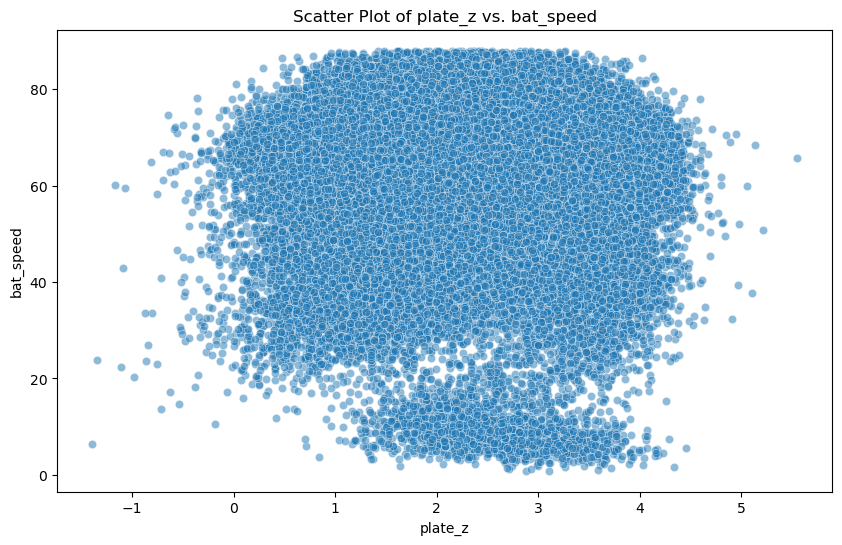

In [87]:
# Scatter plots for key feature relationships
key_pairs = [
    ('bat_speed', 'release_speed'),
    ('swing_length', 'release_speed'),
    ('bat_speed', 'arm_angle'),
    ('plate_x', 'swing_length'),
    ('plate_z', 'bat_speed')
]

for x, y in key_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pitch_swing_data, x=x, y=y, alpha=0.5)
    plt.title(f'Scatter Plot of {x} vs. {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


# FeatureEngineering

In [88]:
# Feature Engineering: Arm Angle Binning
def categorize_arm_angle(angle):
    if 40 <= angle <= 70:
        return 'Overhand'
    elif 10 <= angle < 40 or 70 < angle < 100:
        return 'Three-Quarter'
    else:
        return 'Sidearm/Submarine'

pitch_swing_data['arm_angle_category'] = pitch_swing_data['arm_angle'].apply(categorize_arm_angle)

# Feature Engineering: Strike Zone Binning
def categorize_strike_zone(plate_x, plate_z):
    if -0.5 <= plate_x <= 0.5 and 1.5 <= plate_z <= 3.5:
        return 'Heart'
    elif -1.5 <= plate_x <= 1.5 and 1.0 <= plate_z <= 4.0:
        return 'Shadow'
    elif -2.0 <= plate_x <= 2.0 and 0.5 <= plate_z <= 4.5:
        return 'Chase'
    else:
        return 'Waste'

pitch_swing_data['strike_zone'] = pitch_swing_data.apply(lambda x: categorize_strike_zone(x['plate_x'], x['plate_z']), axis=1)

# Feature Engineering: Release Speed Binning
def categorize_release_speed(speed):
    if speed > 95:
        return 'Fastball'
    elif 85 <= speed <= 95:
        return 'Average'
    else:
        return 'Off-Speed'

pitch_swing_data['release_speed_category'] = pitch_swing_data['release_speed'].apply(categorize_release_speed)

# Feature Engineering: Swing Effectiveness
effective_events = ['single', 'double', 'triple', 'home_run']
pitch_swing_data['swing_effectiveness'] = pitch_swing_data['events'].apply(lambda x: 1 if x in effective_events else 0)


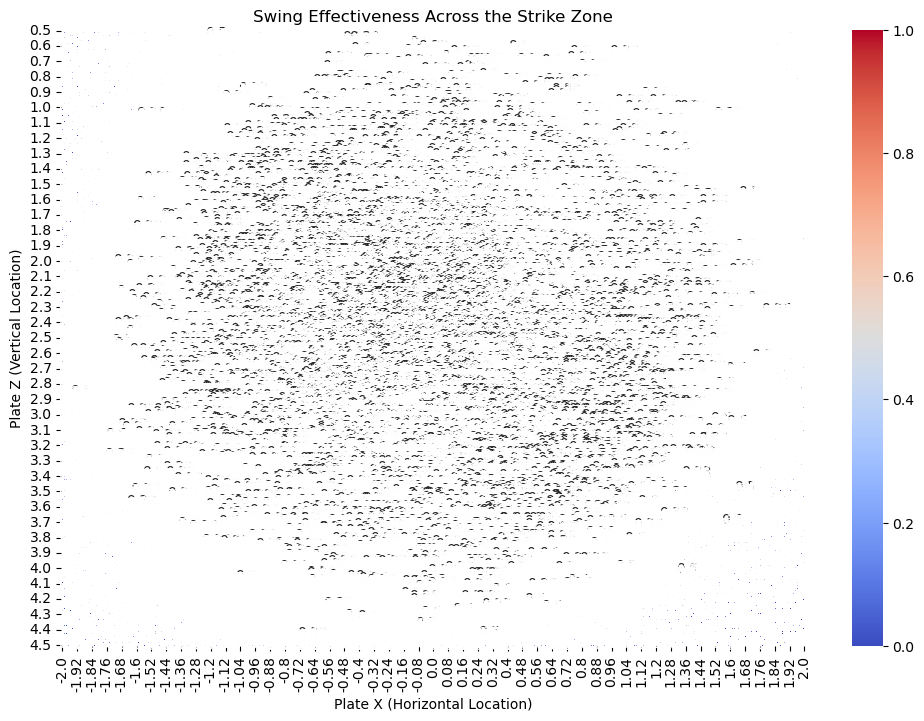

In [89]:
# Heatmap of strike zone region and swing effectiveness
plt.figure(figsize=(12, 8))
heatmap_data = pitch_swing_data[pitch_swing_data['strike_zone'] != 'Waste']
sns.heatmap(pd.crosstab(heatmap_data['plate_z'], heatmap_data['plate_x'], values=heatmap_data['swing_effectiveness'], aggfunc='mean'), cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Swing Effectiveness Across the Strike Zone')
plt.xlabel('Plate X (Horizontal Location)')
plt.ylabel('Plate Z (Vertical Location)')
plt.show()


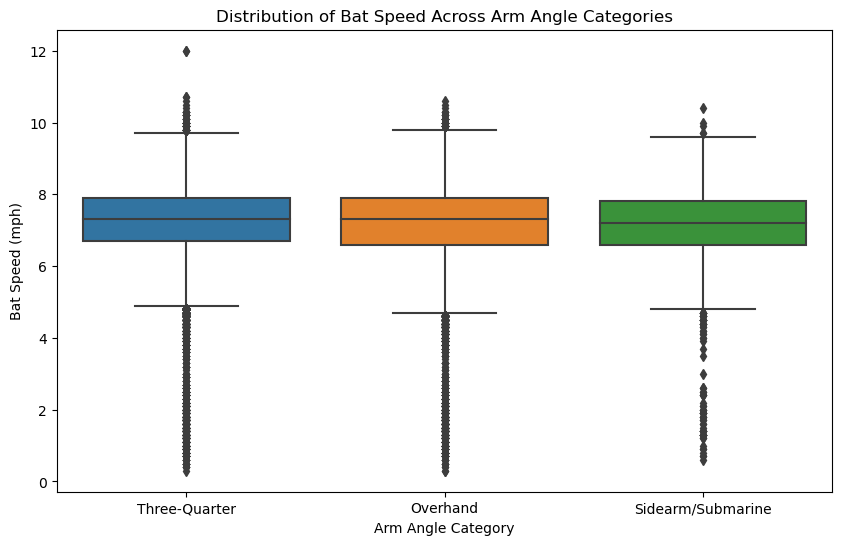

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pitch_swing_data, x='arm_angle_category', y='swing_length')
plt.title('Distribution of Bat Speed Across Arm Angle Categories')
plt.xlabel('Arm Angle Category')
plt.ylabel('Bat Speed (mph)')
plt.show()


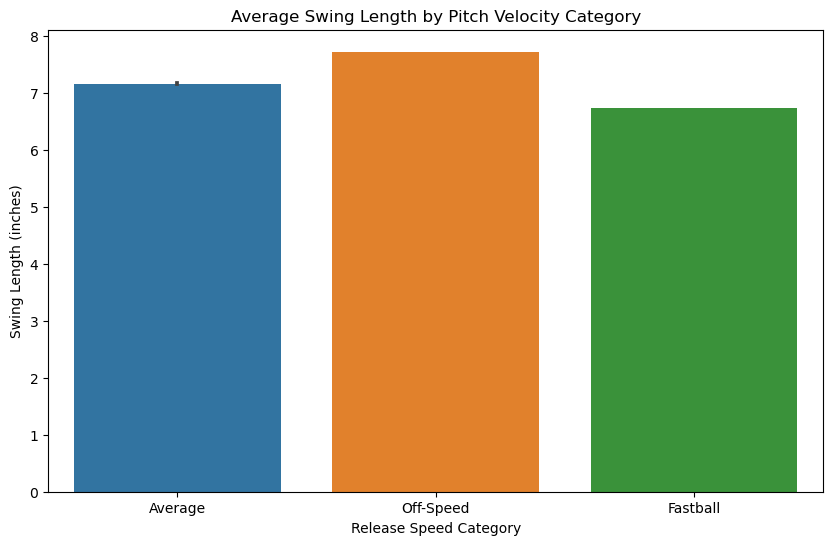

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pitch_swing_data, x='release_speed_category', y='swing_length')
plt.title('Average Swing Length by Pitch Velocity Category')
plt.xlabel('Release Speed Category')
plt.ylabel('Swing Length (inches)')
plt.show()


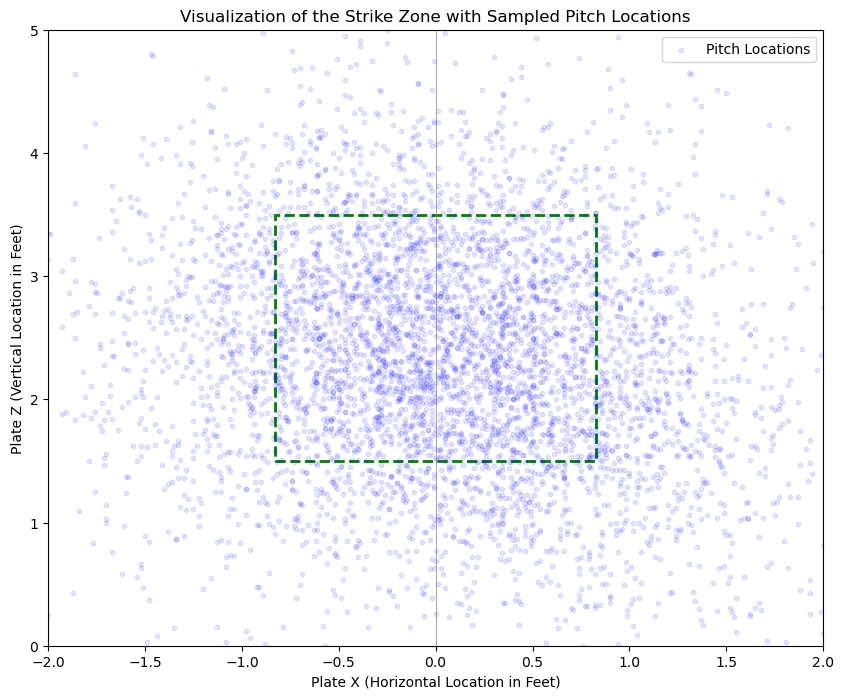

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Sample the data to reduce clutter
sample_size = 5000
sampled_data = pitch_swing_data.sample(n=sample_size, random_state=42)

# Plotting the Strike Zone with a Subsample of the Data
plt.figure(figsize=(10, 8))

# Define the strike zone boundaries
strike_zone_rectangle = plt.Rectangle((-0.83, 1.5), 1.66, 2, fill=False, color='green', linestyle='--', linewidth=2)

# Add the strike zone to the plot
plt.gca().add_patch(strike_zone_rectangle)

# Scatter plot of the sample pitches
plt.scatter(sampled_data['plate_x'], sampled_data['plate_z'], alpha=0.1, color='blue', s=10, label='Pitch Locations')

# Set the axis limits to better visualize the strike zone
plt.xlim(-2, 2)
plt.ylim(0, 5)

# Adding Labels and Title
plt.title('Visualization of the Strike Zone with Sampled Pitch Locations')
plt.xlabel('Plate X (Horizontal Location in Feet)')
plt.ylabel('Plate Z (Vertical Location in Feet)')

# Adding the Centerline for visual aid
plt.axvline(x=0, color='grey', linestyle='-', linewidth=0.5)  # Represents the center of the plate

# Adding Legend
plt.legend()

# Display the Plot
plt.show()


In [105]:
avg_swing_length_by_pitch = pitch_swing_data.groupby('pitch_type')['swing_length'].mean()
print(avg_swing_length_by_pitch)


pitch_type
CH    7.774587
CS    7.975000
CU    7.713137
EP    7.030088
FA    7.199225
FC    7.145978
FF    6.743640
FO    7.988571
FS    7.764914
KC    7.707355
KN    7.338961
PO         NaN
SC    7.497101
SI    6.880474
SL    7.642776
ST    7.683501
SV    7.605444
Name: swing_length, dtype: float64


In [97]:
# Correcting the bins and labels for plate_x and plate_z
plate_x_bins = [-2, -1, -0.5, 0.5, 1, 2]  # 6 values create 5 intervals
plate_z_bins = [1, 2, 3, 4, 5]  # 6 values create 5 intervals

# The number of labels must match the number of intervals
plate_x_labels = ['Left Edge', 'Left-Center', 'Center', 'Right-Center', 'Right Edge']
plate_z_labels = ['Low', 'Middle-Low', 'Middle-High', 'High']

# Applying pd.cut() to create binned columns
pitch_swing_data['plate_x_bin'] = pd.cut(pitch_swing_data['plate_x'], bins=plate_x_bins, labels=plate_x_labels, include_lowest=True)
pitch_swing_data['plate_z_bin'] = pd.cut(pitch_swing_data['plate_z'], bins=plate_z_bins, labels=plate_z_labels, include_lowest=True)


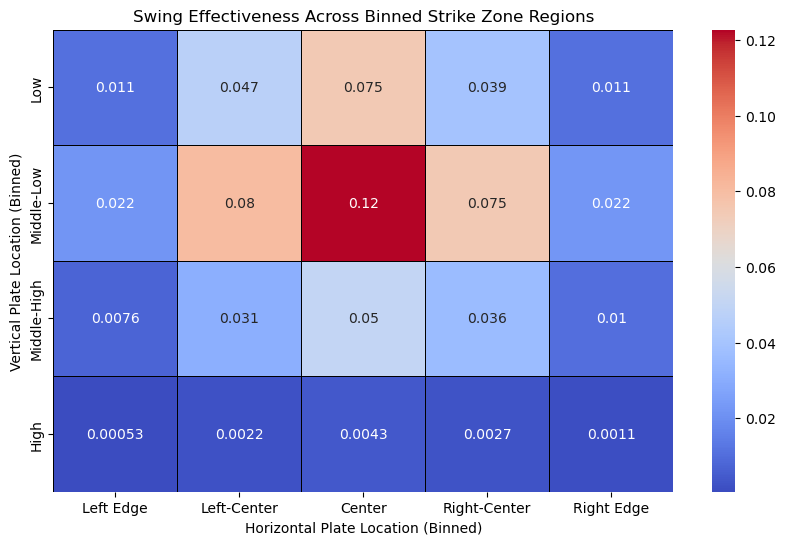

In [98]:
# Pivoting the data to create a matrix of swing effectiveness across different strike zone regions
pivot_data = pitch_swing_data.pivot_table(
    index='plate_z_bin', 
    columns='plate_x_bin', 
    values='swing_effectiveness', 
    aggfunc='mean'
)

# Plotting the refined heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Swing Effectiveness Across Binned Strike Zone Regions')
plt.xlabel('Horizontal Plate Location (Binned)')
plt.ylabel('Vertical Plate Location (Binned)')
plt.show()


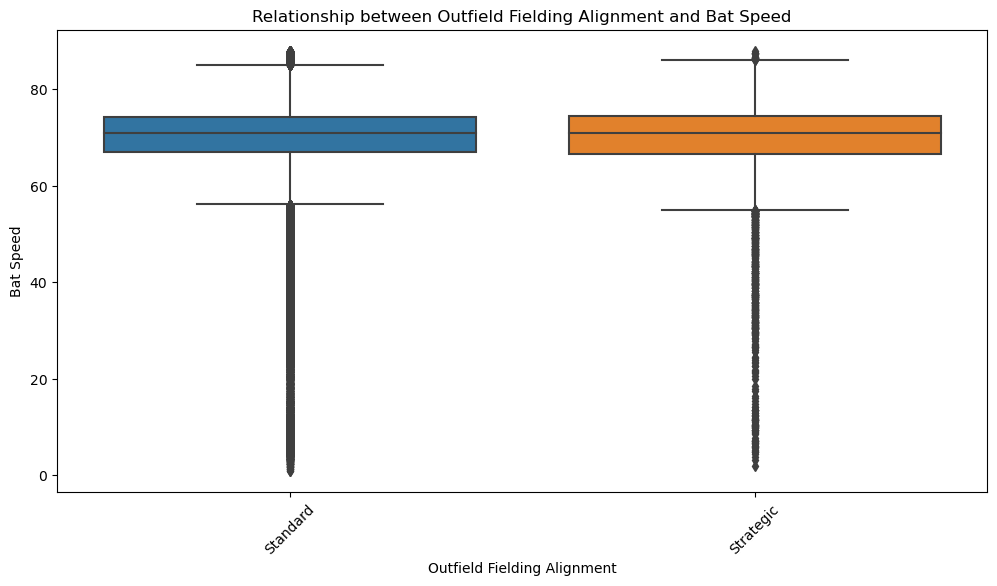

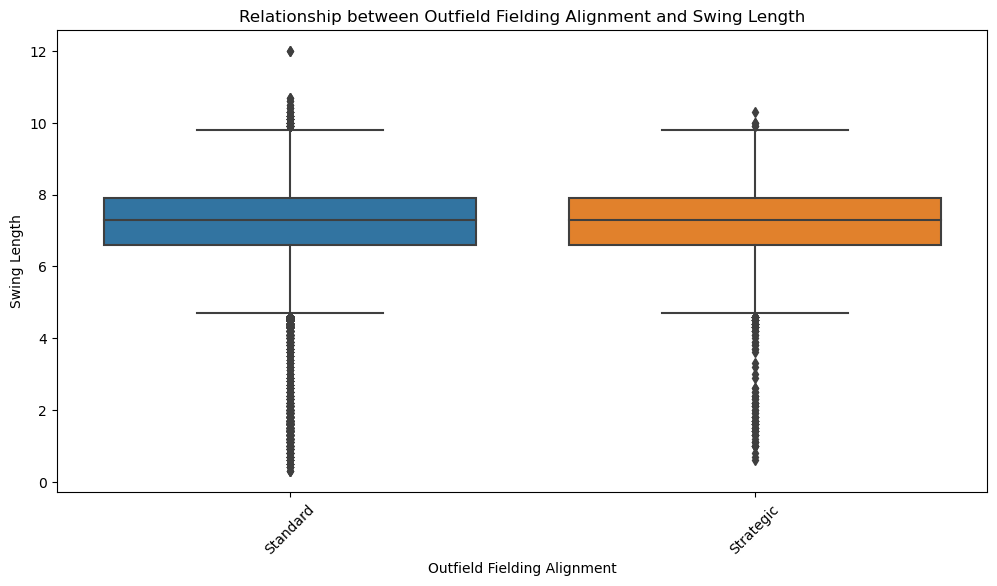

In [74]:
# Plot the relationship between of_fielding_alignment and bat_speed
plt.figure(figsize=(12, 6))
sns.boxplot(x='of_fielding_alignment', y='bat_speed', data=pitch_swing_data)
plt.title('Relationship between Outfield Fielding Alignment and Bat Speed')
plt.xlabel('Outfield Fielding Alignment')
plt.ylabel('Bat Speed')
plt.xticks(rotation=45)
plt.show()

# Plot the relationship between of_fielding_alignment and swing_length
plt.figure(figsize=(12, 6))
sns.boxplot(x='of_fielding_alignment', y='swing_length', data=pitch_swing_data)
plt.title('Relationship between Outfield Fielding Alignment and Swing Length')
plt.xlabel('Outfield Fielding Alignment')
plt.ylabel('Swing Length')
plt.xticks(rotation=45)
plt.show()

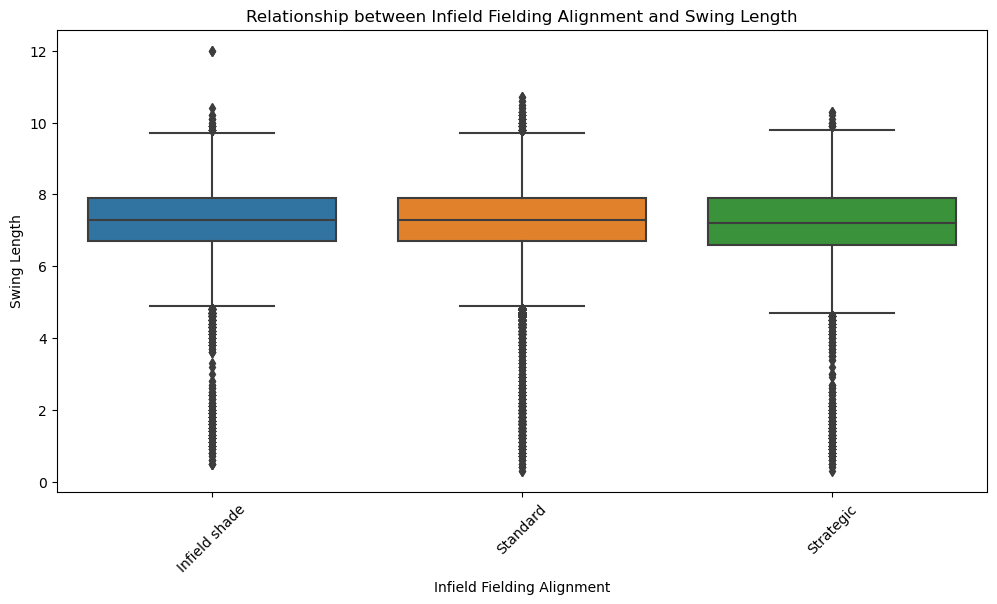

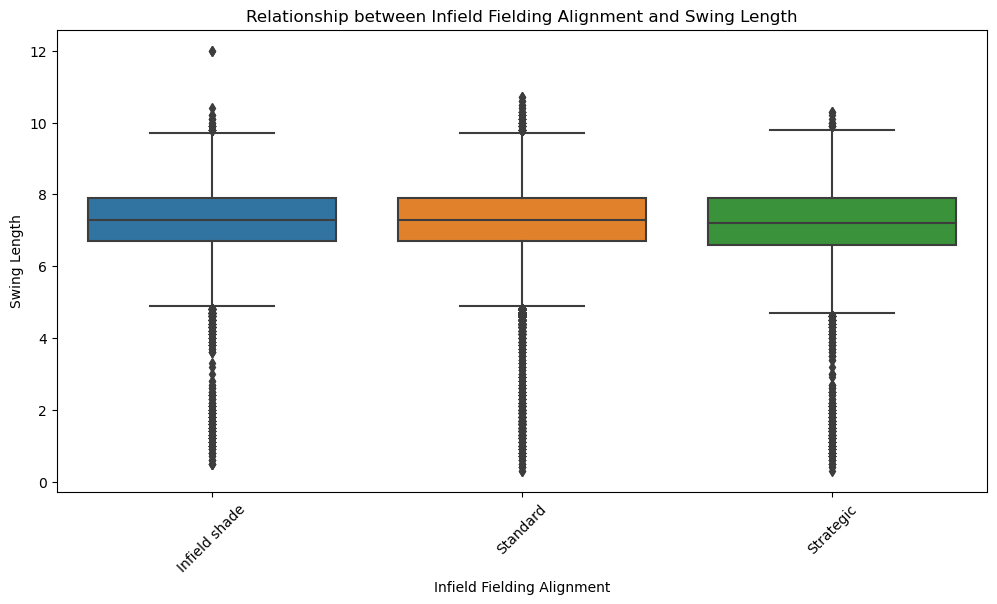

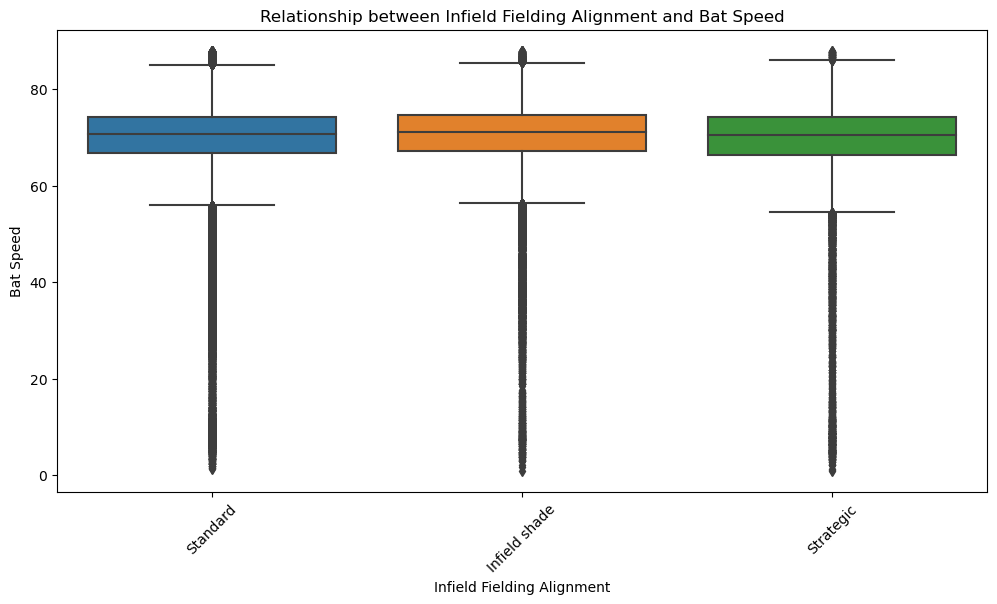

In [77]:

# Drop rows with missing values in 'if_fielding_alignment' or 'bat_speed'
filtered_data = pitch_swing_data.dropna(subset=['if_fielding_alignment', 'bat_speed'])

# Plot the relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='if_fielding_alignment', y='swing_length', data=pitch_swing_data)
plt.title('Relationship between Infield Fielding Alignment and Swing Length')
plt.xlabel('Infield Fielding Alignment')
plt.ylabel('Swing Length')
plt.xticks(rotation=45)
plt.show()

# Plot the relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='if_fielding_alignment', y='bat_speed', data=filtered_data)
plt.title('Relationship between Infield Fielding Alignment and Bat Speed')
plt.xlabel('Infield Fielding Alignment')
plt.ylabel('Bat Speed')
plt.xticks(rotation=45)
plt.show()

In [78]:
pitch_swing_data['balls'].value_counts()

balls
0    320340
1    207245
2    116989
3     56981
4         1
Name: count, dtype: int64

In [43]:
pitch_swing_data['hit_location'].value_counts()

hit_location
2.0    42186
8.0    21580
9.0    19617
7.0    18948
6.0    15160
4.0    13972
5.0    13073
3.0     9150
1.0     4378
Name: count, dtype: int64

In [44]:
pitch_swing_data['zone'].value_counts()

zone
14.0    131819
13.0     86522
11.0     75921
12.0     59179
5.0      52526
8.0      44754
6.0      42757
4.0      41547
9.0      39908
2.0      35861
7.0      33400
1.0      29874
3.0      27203
Name: count, dtype: int64

In [45]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = pitch_swing_data[continuous_columns].corr()

high_corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                   for i in range(len(corr_matrix.columns)) 
                   for j in range(i+1, len(corr_matrix.columns)) 
                   if abs(corr_matrix.iloc[i, j]) > 0.8]

high_corr_pairs


[('release_speed', 'vy0', -0.9997821128522476),
 ('release_speed', 'ay', 0.8212422980635513),
 ('release_speed', 'effective_speed', 0.991245968956652),
 ('release_speed', 'api_break_z_with_gravity', -0.8838331857520039),
 ('release_pos_x', 'vx0', -0.9067096041820449),
 ('batter', 'age_bat_legacy', -0.8414979550563229),
 ('batter', 'age_bat', -0.8428158579190862),
 ('pitcher', 'age_pit_legacy', -0.8654847995078097),
 ('pitcher', 'age_pit', -0.8613701712666164),
 ('balls', 'pitch_number', 0.8115599880198886),
 ('pfx_x', 'ax', 0.9818752809111299),
 ('pfx_z', 'az', 0.9857466902955083),
 ('pfx_z', 'api_break_z_with_gravity', -0.9331077979951207),
 ('inning', 'at_bat_number', 0.9753752327339097),
 ('inning', 'n_priorpa_thisgame_player_at_bat', 0.8368054901475487),
 ('hc_y', 'hit_distance_sc', -0.8705195982416941),
 ('vy0', 'ay', -0.8167285171606559),
 ('vy0', 'effective_speed', -0.9916962150917991),
 ('vy0', 'api_break_z_with_gravity', 0.8837736120030603),
 ('az', 'api_break_z_with_gravity',

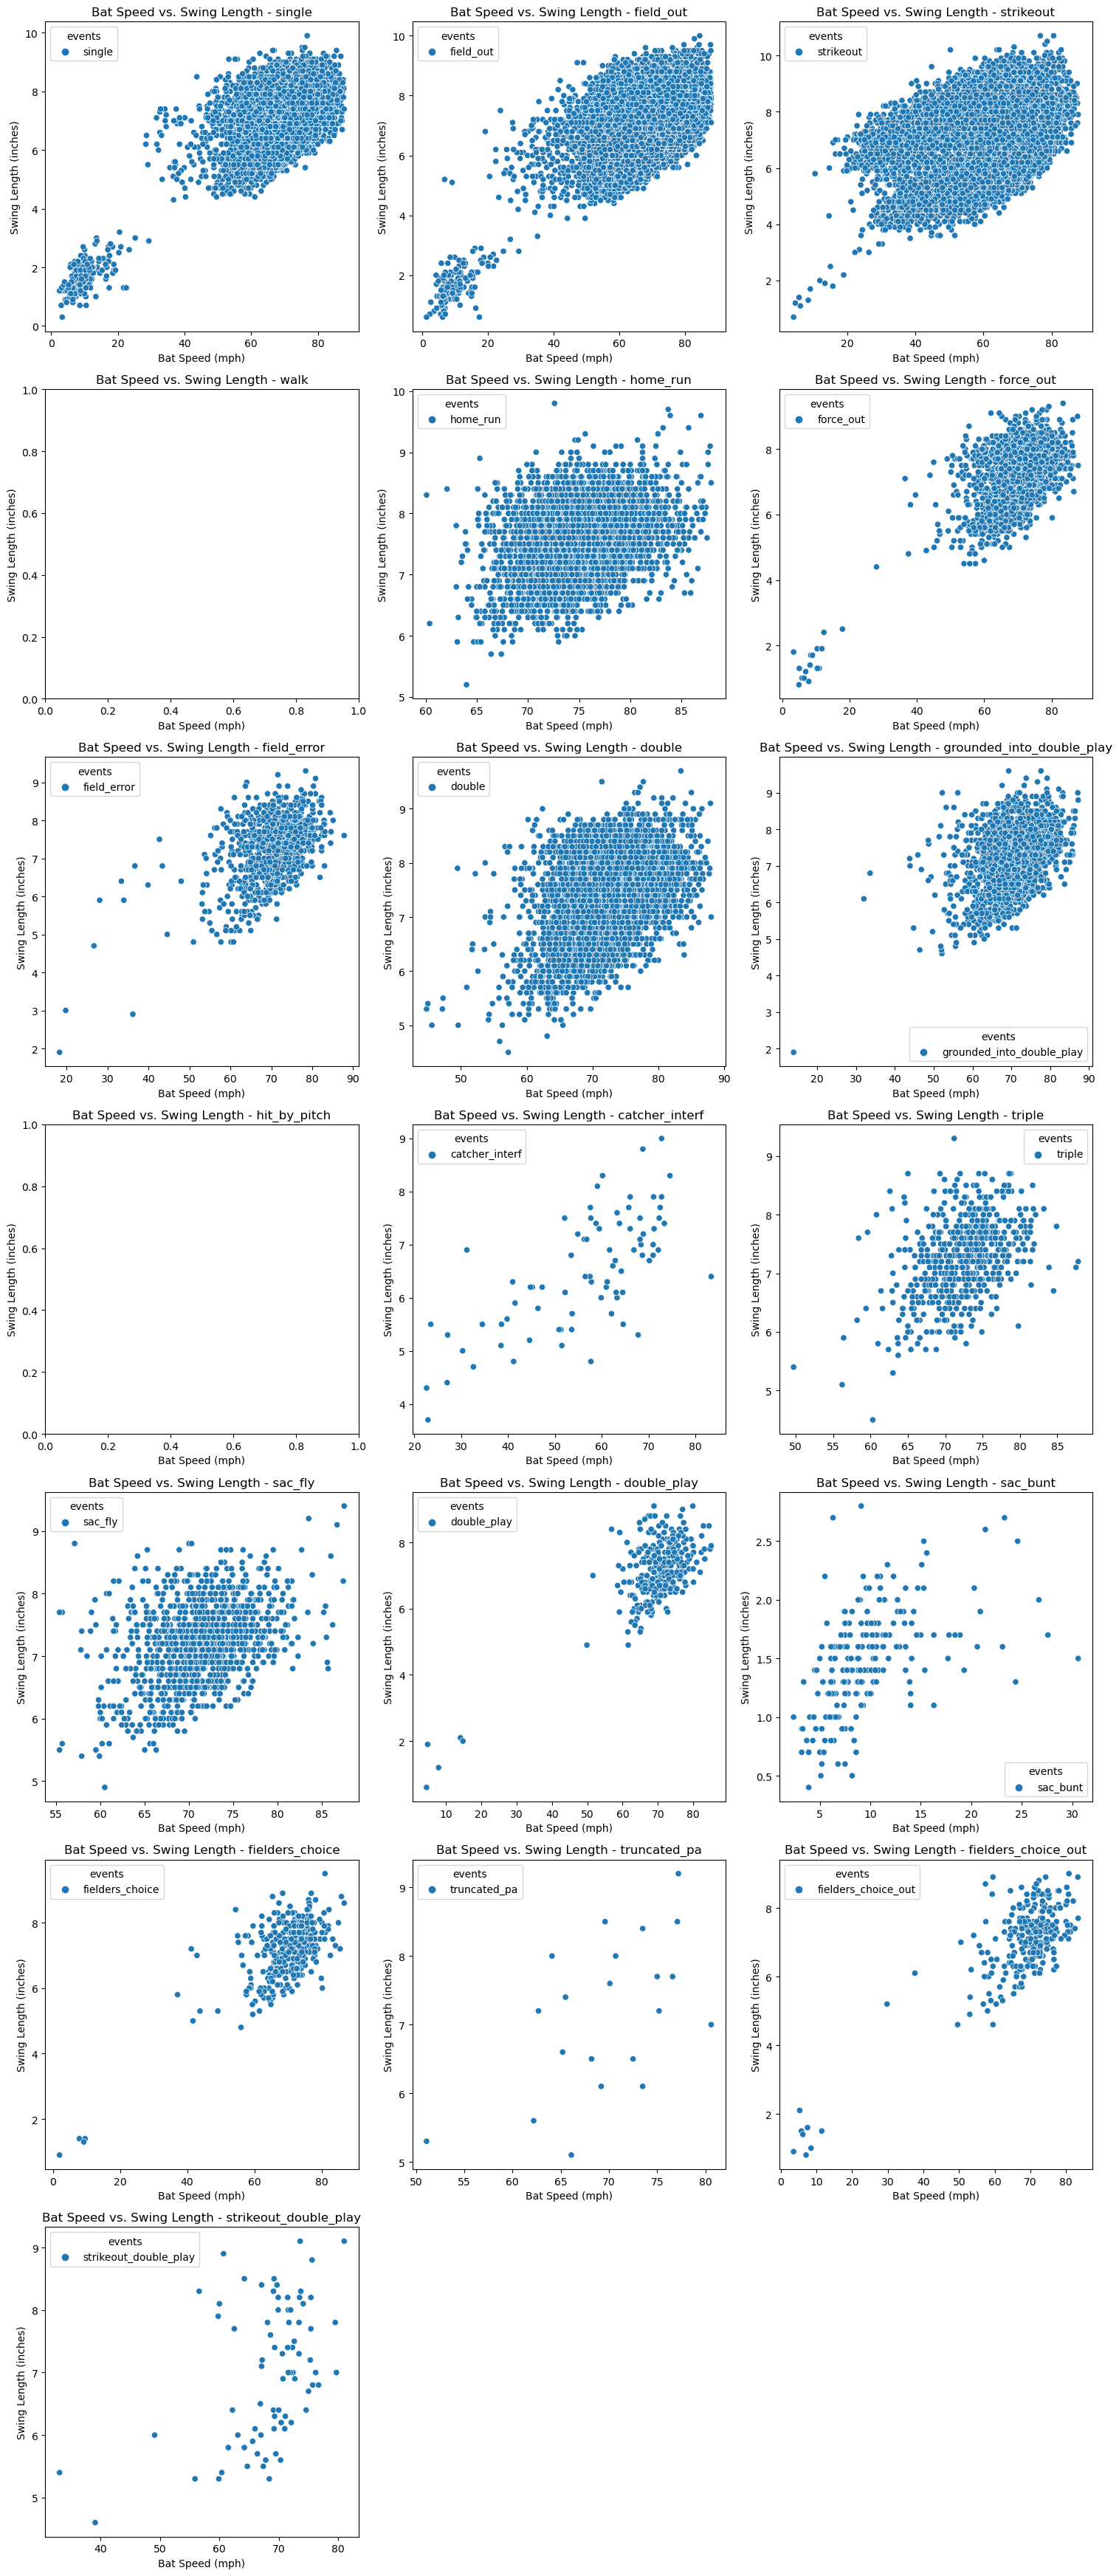

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Filter out event types that have less than 50 samples to avoid cluttered plots
filtered_events = [eve for eve in pitch_swing_data['events'].unique() if len(pitch_swing_data[pitch_swing_data['events'] == eve]) > 50]

# Calculate the number of rows and columns for the subplots grid
num_plots = len(filtered_events)
num_cols = 3  # You can adjust this to fit more/less plots per row
num_rows = math.ceil(num_plots / num_cols)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration, in case of multiple rows/columns
axes = axes.flatten()

# Plot each event type in its own subplot
for i, event in enumerate(filtered_events):
    ax = axes[i]
    filtered_data = pitch_swing_data[pitch_swing_data['events'] == event]
    
    sns.scatterplot(data=filtered_data, x='bat_speed', y='swing_length', hue='events', ax=ax)
    ax.set_title(f'Bat Speed vs. Swing Length - {event}')
    ax.set_xlabel('Bat Speed (mph)')
    ax.set_ylabel('Swing Length (inches)')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


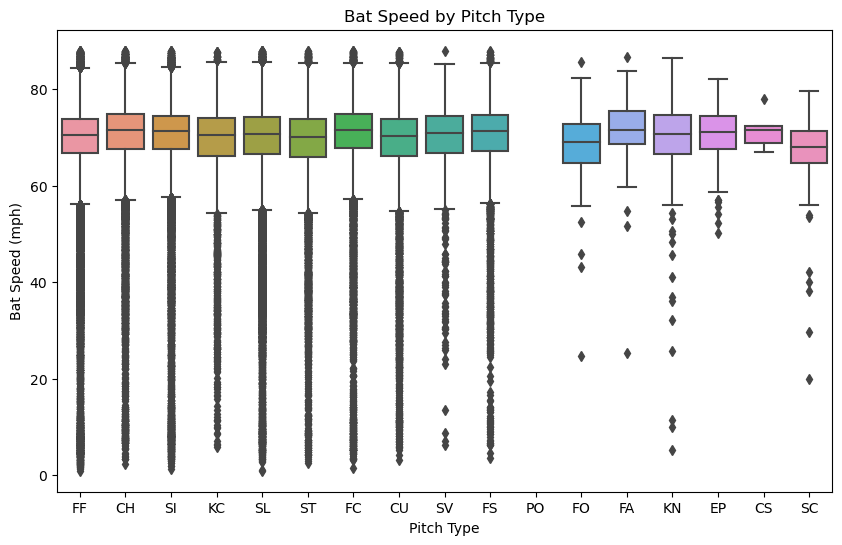

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=pitch_swing_data, x='pitch_type', y='bat_speed')
plt.title('Bat Speed by Pitch Type')
plt.xlabel('Pitch Type')
plt.ylabel('Bat Speed (mph)')
plt.show()


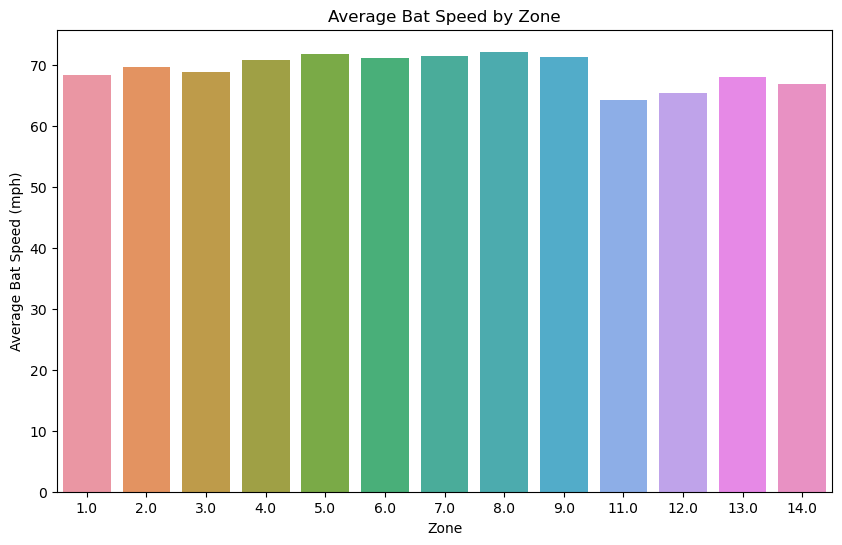

In [48]:
zone_groups = pitch_swing_data.groupby('zone')[['bat_speed', 'swing_length']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=zone_groups, x='zone', y='bat_speed')
plt.title('Average Bat Speed by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Bat Speed (mph)')
plt.show()


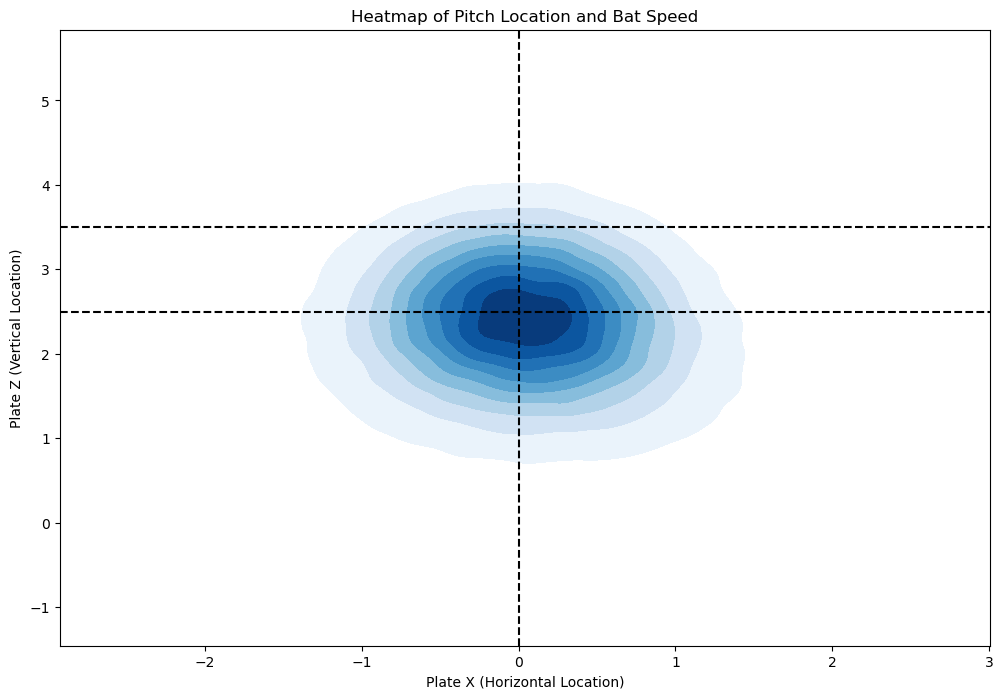

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure size for visualization
plt.figure(figsize=(12, 8))

# Using seaborn's kdeplot to create a heatmap of pitch locations, highlighting bat speed
sns.kdeplot(
    data=pitch_swing_data,
    x='plate_x', 
    y='plate_z', 
    weights='bat_speed',  # Weighted by bat speed to give intensity based on the speed
    fill=True, 
    cmap='Blues',  # Choose a color palette for clarity
    thresh=0.05  # Adjust the threshold for better density visualization
)

# Set plot labels and title
plt.title('Heatmap of Pitch Location and Bat Speed')
plt.xlabel('Plate X (Horizontal Location)')
plt.ylabel('Plate Z (Vertical Location)')
plt.axvline(0, color='black', linestyle='--')  # Add strike zone center line for better reference
plt.axhline(2.5, color='black', linestyle='--')  # Approximate strike zone boundaries
plt.axhline(3.5, color='black', linestyle='--')  # Approximate strike zone boundaries

plt.show()


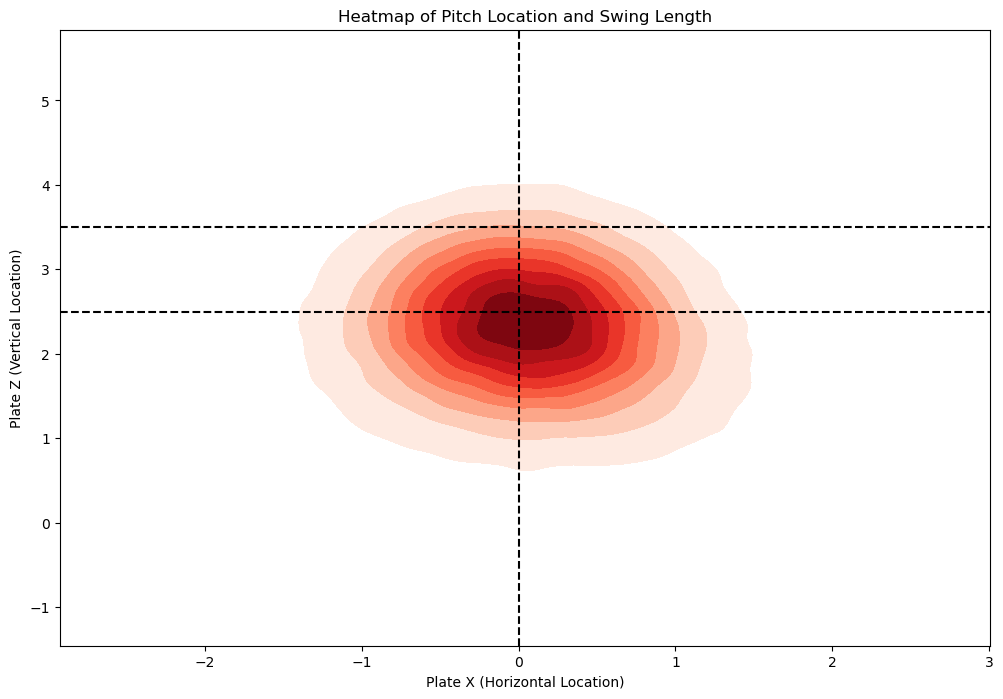

In [65]:
# Visualizing Swing Length based on Pitch Location
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=pitch_swing_data,
    x='plate_x', 
    y='plate_z', 
    weights='swing_length',
    fill=True, 
    cmap='Reds',  # Choose a different color palette for clarity
    thresh=0.05
)

plt.title('Heatmap of Pitch Location and Swing Length')
plt.xlabel('Plate X (Horizontal Location)')
plt.ylabel('Plate Z (Vertical Location)')
plt.axvline(0, color='black', linestyle='--')
plt.axhline(2.5, color='black', linestyle='--')
plt.axhline(3.5, color='black', linestyle='--')

plt.show()


In [20]:
pitch_swing_data[['batter','player_name']].drop_duplicates()

batter      player_name
0       677587  Rocchio, Brayan
3       660271   Ohtani, Shohei
4       595978   Hedges, Austin
5       671213   Casas, Triston
6       519203   Rizzo, Anthony
...        ...              ...
337127  677588       Tena, José
337939  642851    Wynns, Austin
340795  668845    Schunk, Aaron
342986  622491   Castillo, Luis
343609  592325       Gamel, Ben

[559 rows x 2 columns]

In [21]:
pitch_swing_data[['player_name']].drop_duplicates()

player_name
0       Rocchio, Brayan
3        Ohtani, Shohei
4        Hedges, Austin
5        Casas, Triston
6        Rizzo, Anthony
...                 ...
337127       Tena, José
337939    Wynns, Austin
340795    Schunk, Aaron
342986   Castillo, Luis
343609       Gamel, Ben

[559 rows x 1 columns]

In [15]:
pitch_swing_data[['pitcher']].drop_duplicates()

pitcher
0        622491
3        657277
5        622072
6        668678
18       666200
...         ...
341063   642086
343415   681806
343673   670036
343729   640454
343849   681799

[689 rows x 1 columns]

In [48]:
pitch_swing_data[['batter', 'pitcher', 'player_name']].drop_duplicates()

batter  pitcher      player_name
0       677587   622491  Rocchio, Brayan
3       660271   657277   Ohtani, Shohei
4       595978   622491   Hedges, Austin
5       671213   622072   Casas, Triston
6       519203   668678   Rizzo, Anthony
...        ...      ...              ...
346110  669394   622554     Burger, Jake
346113  668731   519043     Baddoo, Akil
346124  663550   493603    Cabbage, Trey
346151  621466   687911      Stewart, DJ
346170  678662   656629  Tovar, Ezequiel

[48283 rows x 3 columns]

In [43]:
pitch_swing_data['fielder_3']

0         664034
1         664034
2         664034
3         527038
4         664034
           ...  
346245    683734
346246    669911
346247    687462
346248    669394
346249    502671
Name: fielder_3, Length: 346250, dtype: int64

In [7]:
pitch_swing_data['pitch_type'].value_counts()

pitch_type
FF    108346
SL     57024
SI     55770
CH     35317
FC     28199
CU     22573
ST     20013
FS     10920
KC      5524
SV      1159
KN       576
FA       288
EP       166
FO       102
PO        20
CS         3
Name: count, dtype: int64

In [10]:
pitch_swing_data['game_date'].min(), pitch_swing_data['game_date'].max()

('2024-04-02', '2024-06-30')

In [49]:
pitch_swing_data['player_name'].nunique()

651

In [50]:
pitch_swing_data['batter'].nunique()

651

In [52]:
pitch_swing_data['pitcher']

0         622491
1         622491
2         622491
3         668678
4         622491
           ...  
701552    543037
701553    605280
701554    596133
701555    607455
701556    592454
Name: pitcher, Length: 701557, dtype: int64

In [26]:
pitch_swing_data['events'].value_counts()

events
field_out                       36512
strikeout                       19716
single                          12643
walk                             7042
double                           3812
home_run                         2532
force_out                        1716
grounded_into_double_play        1614
hit_by_pitch                     1012
sac_fly                           621
field_error                       570
triple                            353
sac_bunt                          225
fielders_choice                   176
fielders_choice_out               163
double_play                       161
caught_stealing_2b                131
strikeout_double_play              57
catcher_interf                     55
other_out                           9
caught_stealing_home                6
caught_stealing_3b                  6
pickoff_1b                          4
stolen_base_2b                      2
sac_fly_double_play                 2
pickoff_caught_stealing_3b          1
picko

In [27]:
pitch_swing_data['description'].value_counts()

description
ball                       115169
foul                        62378
hit_into_play               61105
called_strike               57244
swinging_strike             35799
blocked_ball                 7308
foul_tip                     3654
swinging_strike_blocked      1877
hit_by_pitch                 1012
foul_bunt                     586
missed_bunt                    94
pitchout                       20
bunt_foul_tip                   4
Name: count, dtype: int64

In [32]:
pitch_swing_data['spin_dir'].value_counts()

Series([], Name: count, dtype: int64)

In [33]:
pitch_swing_data['spin_rate_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [34]:
pitch_swing_data['break_angle_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [35]:
pitch_swing_data['break_length_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [36]:
pitch_swing_data['zone'].value_counts()

zone
14.0    66145
13.0    42739
11.0    35822
12.0    28753
5.0     26187
8.0     22494
6.0     21387
4.0     20401
9.0     20097
2.0     17517
7.0     16550
1.0     14514
3.0     13392
Name: count, dtype: int64

In [37]:
pitch_swing_data['des'].value_counts()

des
Bryan De La Cruz strikes out swinging.                                                            365
Ezequiel Tovar strikes out swinging.                                                              359
Cal Raleigh strikes out swinging.                                                                 357
Kyle Schwarber strikes out swinging.                                                              348
Paul DeJong strikes out swinging.                                                                 335
                                                                                                 ... 
Tyler Fitzgerald flies out to center fielder Andy Pages.                                            1
Chas McCormick singles on a line drive to left fielder Brandon Nimmo.   Mauricio Dubón scores.      1
Trey Cabbage flies out to center fielder Harrison Bader.   Mauricio Dubón to 3rd.                   1
Austin Slater grounds out to first baseman Cavan Biggio.                      

In [38]:
pitch_swing_data['game_type'].value_counts()

game_type
R    346250
Name: count, dtype: int64

In [39]:
pitch_swing_data['stand'].value_counts()

stand
R    200003
L    146247
Name: count, dtype: int64

In [40]:
pitch_swing_data['p_throws'].value_counts()

p_throws
R    252561
L     93689
Name: count, dtype: int64

In [29]:
pitch_swing_data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher_1',
       'fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima